<a href="https://colab.research.google.com/github/LMAPcoder/Advanced-Computer-Vision/blob/main/ACV_sheet7_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Computer Vision

## Exercise sheet 7

The goal of Metric Learning is to learn a representation function that maps objects into an embedded space. The distance in the embedded space should preserve the objects’ similarity — similar objects get close and dissimilar objects get far away.

### Task 1 – Embedding From Classification Model

The embedding space is a transformed space where data points, in this case images, are represented as vectors, and the relationships between these vectors are designed to reflect meaningful similarities or differences between the original data points.

The embedding space typically has lower dimensionality compared to the original data space.

Wherever the task, the model learns an embedding space that serves the purpose of the problem at hand.

Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.use('Agg')

In [ ]:
# tf.test.gpu_device_name()
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
def mnist_data():
    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
    y_train = tf.keras.utils.to_categorical(y_train)
    y_test = tf.keras.utils.to_categorical(y_test)
    x_train = x_train/255.0
    x_test = x_test/255.0
    return x_train, y_train, x_test, y_test

In [ ]:
x_train, y_train, x_test, y_test = mnist_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Size of training and test data
print("Training dataset:", x_train.shape)
print("Test dataset:", x_test.shape)

Training dataset: (60000, 28, 28)
Test dataset: (10000, 28, 28)


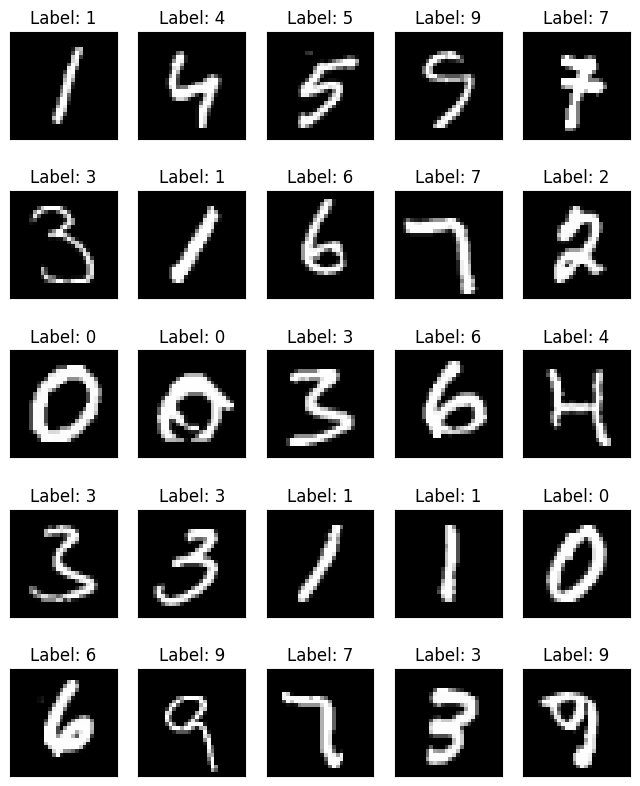

In [ ]:
#Printing a random subset of training dataset along with the labels

fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(8,10))
for i in range(5):
    for j in range(5):
        idx = np.random.randint(x_train.shape[0])
        ax[i,j].set_title(f'Label: {np.argmax(y_train[idx])}')
        ax[i,j].imshow(x_train[idx], cmap='gray')
        ax[i,j].axes.yaxis.set_visible(False)
        ax[i,j].axes.xaxis.set_visible(False)

In [ ]:
# Build a simple CNN with strided convolution layers
def define_model():
    inputs = tf.keras.Input(shape=(28,28,1),name='Inputs')
    x = layers.Conv2D(16,kernel_size=(5,5),activation='relu',padding='same',strides=1,name='L1')(inputs)
    x = layers.Conv2D(16,kernel_size=(3,3),activation='relu',padding='same',strides=2,name='L2')(x)
    x = layers.Conv2D(16,kernel_size=(3,3),activation='relu',padding='same',strides=1,name='L3')(x)
    x = layers.Conv2D(16,kernel_size=(3,3),activation='relu',padding='same',strides=2,name='L4')(x)
    x = layers.Flatten(name='flatten')(x)
    x = layers.Dense(2,name='embedding')(x)
    outputs = layers.Dense(10,activation='softmax')(x)
    model = keras.Model(inputs=inputs, outputs=outputs)

    model.summary() # show model overview

    return model

In [ ]:
BATCH_SIZE = 32
EPOCHS = 20
LEARNING_RATE = 0.001

OPT = optimizer=keras.optimizers.Adam(
    learning_rate=LEARNING_RATE
)


model_1 = define_model()
model_1.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=OPT, metrics=["accuracy"])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 L1 (Conv2D)                 (None, 28, 28, 16)        416       
                                                                 
 L2 (Conv2D)                 (None, 14, 14, 16)        2320      
                                                                 
 L3 (Conv2D)                 (None, 14, 14, 16)        2320      
                                                                 
 L4 (Conv2D)                 (None, 7, 7, 16)          2320      
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 embedding (Dense)           (None, 2)                 1570

In [ ]:
%%time
history_1 = model_1.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/20
1875/1875 [==============================] - 13s 5ms/step - loss: 0.8104 - accuracy: 0.7413
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4576 - accuracy: 0.8802
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3671 - accuracy: 0.9044
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3152 - accuracy: 0.9191
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2843 - accuracy: 0.9274
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2608 - accuracy: 0.9326
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2389 - accuracy: 0.9391
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2240 - accuracy: 0.9436
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2059 - accuracy: 0.9475
Epoch 10/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1

In [ ]:
#Creating a new model without the last dense layer

inputs = model_1.input
outputs = model_1.get_layer('embedding').output
new_model = keras.Model(inputs=inputs, outputs=outputs)

new_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 L1 (Conv2D)                 (None, 28, 28, 16)        416       
                                                                 
 L2 (Conv2D)                 (None, 14, 14, 16)        2320      
                                                                 
 L3 (Conv2D)                 (None, 14, 14, 16)        2320      
                                                                 
 L4 (Conv2D)                 (None, 7, 7, 16)          2320      
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 embedding (Dense)           (None, 2)                 1570

In [ ]:
%%time
# Getting the embeddings for the images in the dataset

preds1_train = new_model.predict(x_train)
preds1_train.shape

1875/1875 [==============================] - 3s 2ms/step
CPU times: user 4.6 s, sys: 509 ms, total: 5.11 s
Wall time: 4.95 s


(60000, 2)

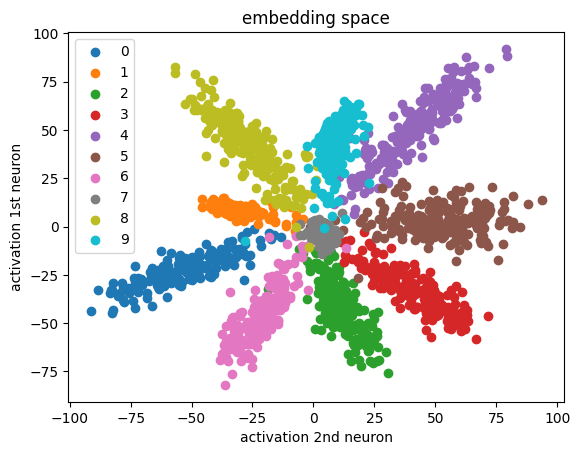

In [ ]:
plt.title('embedding space')

for _ in range(10):
    idxs = np.where(np.argmax(y_train, axis=1) == _)[0]
    plt.scatter(preds1_train[idxs[:200],0],preds1_train[idxs[:200],1], label=_)


plt.xlabel('activation 2nd neuron')
plt.ylabel('activation 1st neuron')
plt.legend()
plt.show()

Note: We can see clear clusters for each class. However, these cluster are very close to each other in the center of the origin of coordinates

### Task 2 – Embedding From Contrastive Loss

In [ ]:
# Build a simple CNN with strided convolution layers
def define_model():
    inputs = tf.keras.Input(shape=(28,28,1),name='Inputs')
    x = layers.Conv2D(16,kernel_size=(5,5),activation='relu',padding='same',strides=1,name='L1')(inputs)
    x = layers.Conv2D(16,kernel_size=(3,3),activation='relu',padding='same',strides=2,name='L2')(x)
    x = layers.Conv2D(16,kernel_size=(3,3),activation='relu',padding='same',strides=1,name='L3')(x)
    x = layers.Conv2D(16,kernel_size=(3,3),activation='relu',padding='same',strides=2,name='L4')(x)
    x = layers.Flatten(name='flatten')(x)
    outputs = layers.Dense(2,name='embedding')(x)
    # outputs = layers.Dense(10,activation='softmax')(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

Contrastive loss

\begin{align}
l((x_i, x_j), (y_i, y_j)) = I(y_i = y_j) D_{i,j} + (1-I(y_i = y_j))\max(0, \alpha - D_{i,j})
\end{align}

In [ ]:
class ContastiveLoss(tf.keras.losses.Loss):
    def __init__(self, name='contrastive', alpha=1.0):
        self.margin = alpha
        super().__init__(name=name)

    def call(self, y_true, y_pred):
        num_samples = y_true.shape[0]
        indices = tf.random.shuffle(tf.range(num_samples))
        labels = tf.argmax(y_true, axis=1)

        labels_bis = tf.gather(labels, indices)
        y_pred_bis = tf.gather(y_pred, indices)


        D = tf.reduce_sum(tf.square(tf.subtract(y_pred, y_pred_bis)), axis=1)

        I = tf.cast(tf.math.equal(labels, labels_bis), dtype=tf.float32)

        L = tf.math.multiply(I, D) + tf.math.multiply(1 - I, tf.math.maximum(0.0, self.margin- D))

        return tf.reduce_sum(L)

In [ ]:
%%time

BATCH_SIZE = 32
EPOCHS = 20
LEARNING_RATE = 0.001

OPT = optimizer=keras.optimizers.Adam(
    learning_rate=LEARNING_RATE
)


model_2 = define_model()
model_2.compile(loss=ContastiveLoss(), optimizer=OPT)

history_2 = model_2.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/20
1875/1875 [==============================] - 11s 4ms/step - loss: 5.0184
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 3.3589
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 2.7073
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 2.4972
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2576
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 2.1519
Epoch 7/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.9863
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 1.7719
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7856
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6981
Epoch 11/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6625
Epoch 12/20
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5763


In [ ]:
%%time
# Getting the embeddings for the images in the dataset

preds2_train = model_2.predict(x_train)
preds2_train.shape

1875/1875 [==============================] - 3s 2ms/step
CPU times: user 4.73 s, sys: 598 ms, total: 5.33 s
Wall time: 5.67 s


(60000, 2)

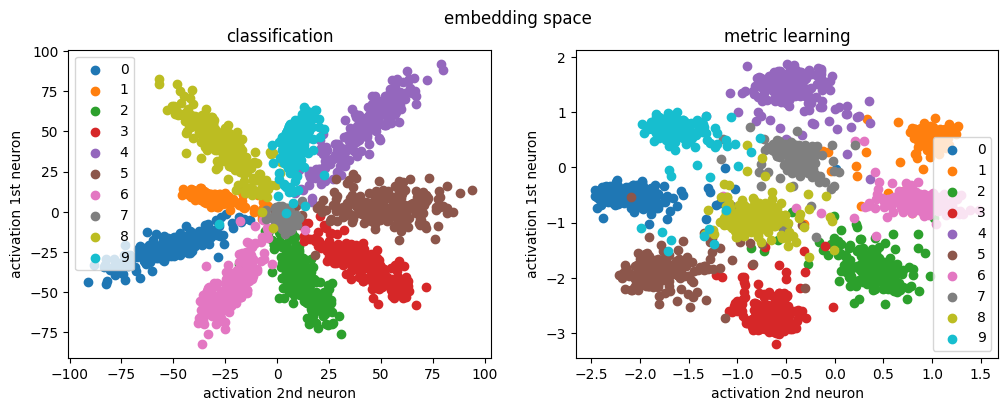

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

fig.suptitle('embedding space')


for _ in range(10):
    idxs = np.where(np.argmax(y_train, axis=1) == _)[0]
    axes[0].scatter(preds1_train[idxs[:200],0],preds1_train[idxs[:200],1], label=_)


axes[0].set_title('classification')
axes[0].set_xlabel('activation 2nd neuron')
axes[0].set_ylabel('activation 1st neuron')
axes[0].legend()

for _ in range(10):
    idxs = np.where(np.argmax(y_train, axis=1) == _)[0]
    axes[1].scatter(preds2_train[idxs[:200],0],preds2_train[idxs[:200],1], label=_)


axes[1].set_title('metric learning')
axes[1].set_xlabel('activation 2nd neuron')
axes[1].set_ylabel('activation 1st neuron')
axes[1].legend()

plt.show()

Note: We can see how the same data are located in a different embedding space by a different task, in this case metric learning. This embedding space has clusters that are more separated from each other. The embeddings tend to be more robust and generalize better to unseen data.

Saliency map

In [ ]:
# Compute gradient of the output of a model <model> with respect to its input <inp>
# If the output of the model is a vector, <output_index> choses which element of output to use
def gradient_input(model, inp, output_index=0):
    inp_tensor = tf.convert_to_tensor(inp, dtype=tf.float32)
    with tf.GradientTape() as t:
        t.watch(inp_tensor) # enable gradient recording w.r.t. to this tensor
        output = tf.squeeze(model(inp_tensor)) # forward inference
        if output.ndim > 0:
            my_output = output[output_index] # pick right element from output
        else:
            my_output = output
    gradient = t.gradient(my_output, inp_tensor) # get gradient @my_output/@input
    gradient = np.squeeze(np.array(gradient)) # convert from tensor to numpy array
    return gradient

In [ ]:
print("class:", np.argmax(y_train[3]))
img = x_train[3]
x = np.expand_dims(img, axis=0)
print("input shape:", x.shape)

class: 1
input shape: (1, 28, 28)


In [ ]:
output_index = 1 #index of ouzel class within ImageNet

g = gradient_input(model_1, x, output_index)

print("Gradient shape:", g.shape)

Gradient shape: (28, 28)


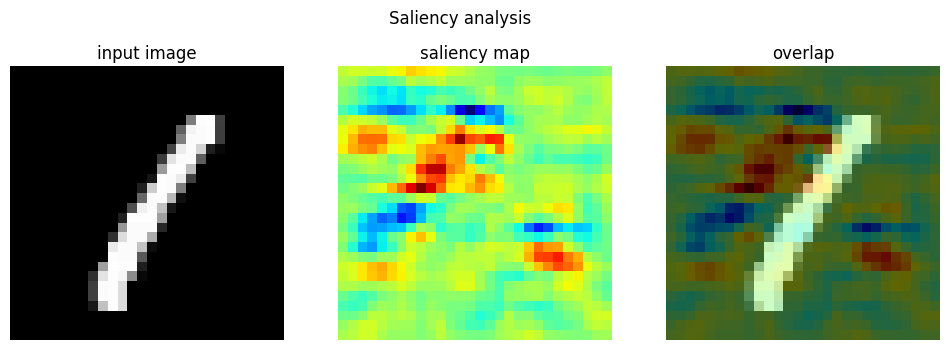

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

fig.suptitle(f'Saliency analysis')

axes[0].imshow(img, cmap='gray')
axes[0].set_title('input image')
axes[0].axis('off')

axes[1].imshow(g, cmap='jet')
axes[1].set_title('saliency map')
axes[1].axis('off')

axes[2].imshow(img, cmap='gray')
axes[2].imshow(g, cmap='jet', alpha=0.4)
axes[2].set_title('overlap')
axes[2].axis('off')

plt.show()

We can notice a missaligment between the input image and the saliency map.